# Gradient boost 
https://stats.stackexchange.com/questions/377705/gradient-boosting-price-forecast-based-on-time-series-data

In [1]:
from matplotlib import pyplot
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data/nyc_energy.csv',index_col=0)
data.index = pd.to_datetime(data.index)

# Data Cleaning

#missing values
data = data.replace('?', np.nan)

# dropna
#data = data.dropna()

#forward fill
data = data.astype(np.float).fillna(method='ffill')

In [3]:
data.head()

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0,46.13
2012-01-01 01:00:00,4752.1,0.0,45.89
2012-01-01 02:00:00,4542.6,0.0,45.04
2012-01-01 03:00:00,4357.7,0.0,45.03
2012-01-01 04:00:00,4275.5,0.0,42.61


In [4]:
X = data[['precip', 'temp']]
y = data['demand']
split = int(len(X)*.7)
X_train, X_test = X[0:split], X[split+1:]
y_train, y_test = y[0:split], y[split+1:]

In [5]:
gbrt=GradientBoostingRegressor() 
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
results = cross_val_score(gbrt, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)



lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Accuracy: 59.58% (1.13%)
Liner Regression RMSE: 785.0029


In [6]:
prediction=gbrt.predict(X)

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 10

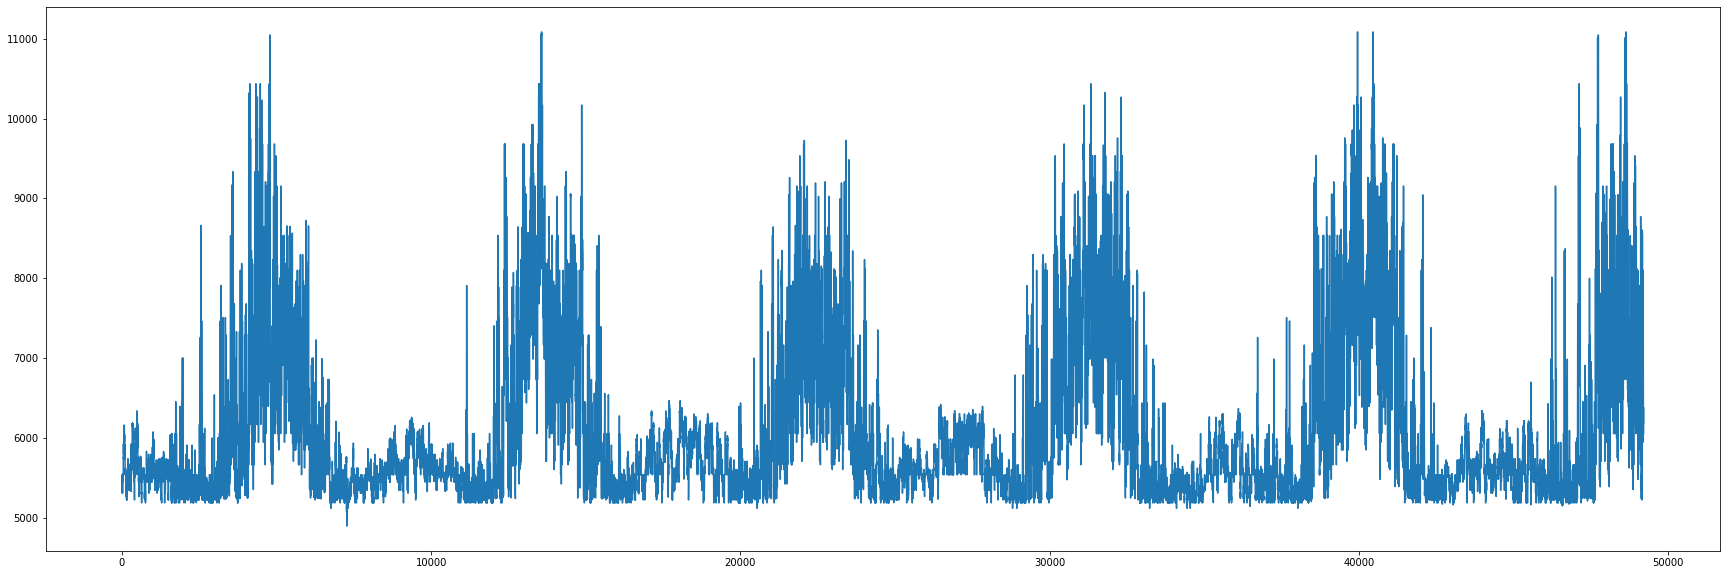

In [9]:
plt.plot(gbrt.predict(X))

In [10]:
forecast = gbrt.predict(X)

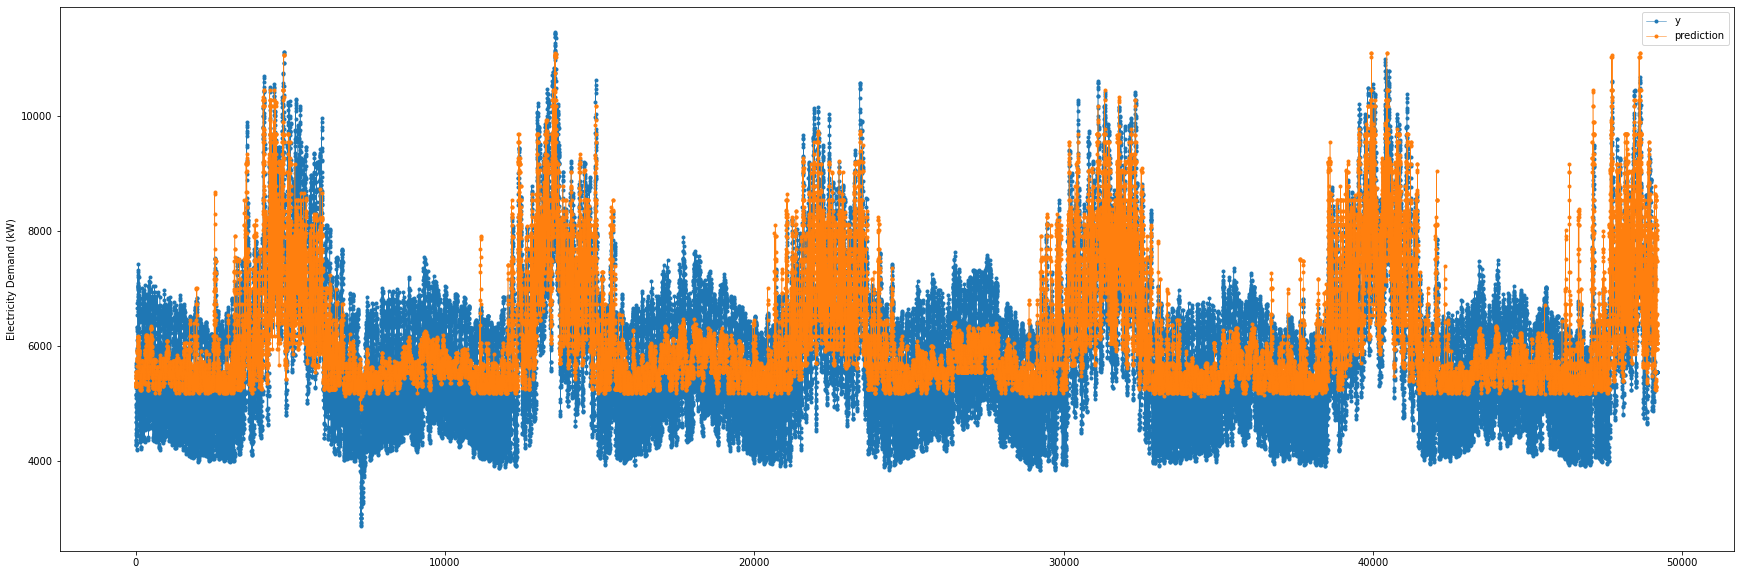

In [11]:
fig, ax = plt.subplots()
ax.plot(np.array(y),marker='.', linestyle='-', linewidth=0.5, label='y')
ax.plot(forecast,marker='.', linestyle='-', linewidth=0.5, label='prediction')
ax.set_ylabel('Electricity Demand (kW)')
ax.legend();